# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Step 2. EDA 및 데이터 기초 통계 분석


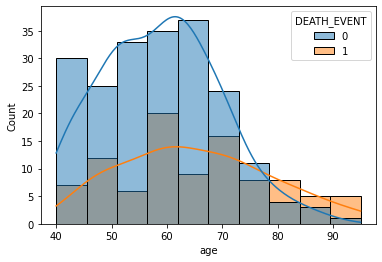

In [6]:
# 히스토그램 그리기
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True);

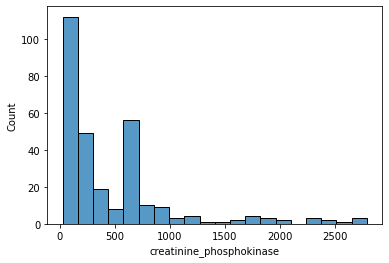

In [21]:
# 크레아틴 키나제 검사 결과
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase']);

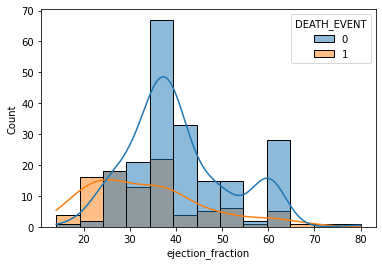

In [27]:
# 박출계수
sns.histplot(x='ejection_fraction', data=df, bins=13, hue = 'DEATH_EVENT', kde=True);

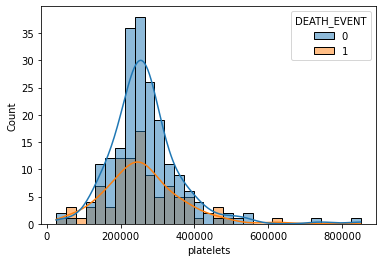

In [29]:
# 혈소판
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT', kde=True);

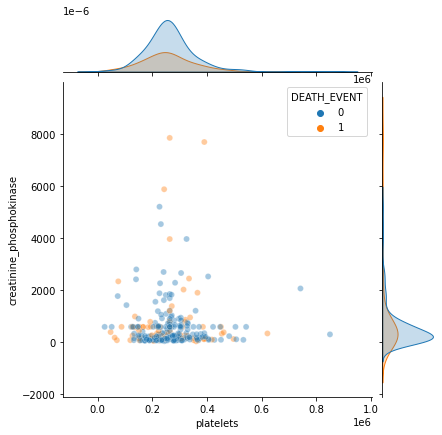

In [33]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.4);

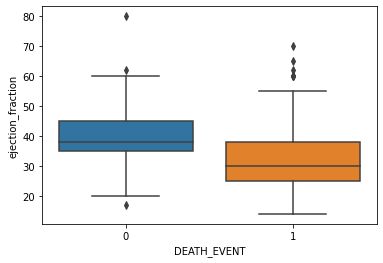

In [35]:
# seaborn의 Boxplot 사용
# hue 키워드를 사용하여 범주 세분화 가능
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df);

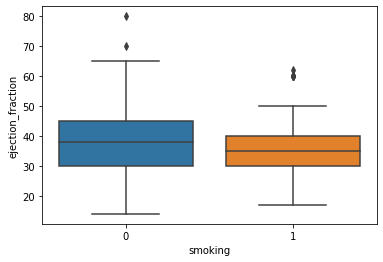

In [37]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df);

- 흡연자들이 비흡연자에 비해 박출량이 낮다.

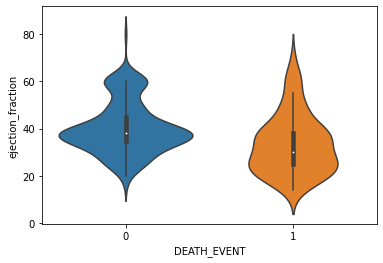

In [39]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df);

/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


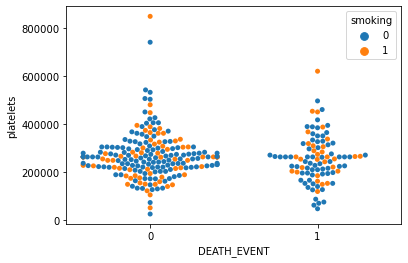

In [41]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df);

- scatter + violin plot 합친 형태.
- 흡연자 / 비흡연자 구분 및 혈소판 수치와 생사여부를 시각적으로 구성 가능.

## Step 3. 모델 학습을 위한 데이터 전처리


In [42]:
from sklearn.preprocessing import StandardScaler

In [70]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [79]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [80]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num) # transform을 하게 되면 Numpy-Array로 바뀜
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
from sklearn.metrics import classification_report

In [86]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



## Step5 모델 학습 결과 심화 분석하기


In [89]:
from sklearn.metrics import plot_precision_recall_curve

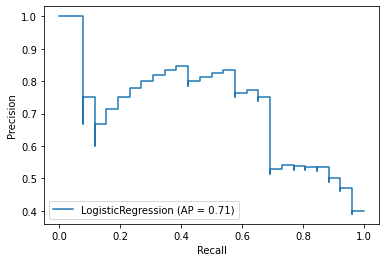

In [91]:
# LR의 Precision-Recall 커브 그리기
plot_precision_recall_curve(model_lr, X_test, y_test);

- AP가 높을 수록 좋은 것임. Recall을 증가시키면서 잘 유지가 되었기 때문에.

In [92]:
from sklearn.metrics import plot_roc_curve

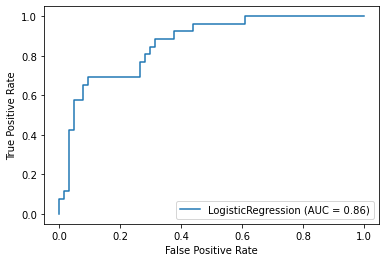

In [94]:
# LR의 ROC 커브를 그리기
plot_roc_curve(model_lr, X_test, y_test);

- FPR이 낮을 때 TPR이 빨리 1에 도달하는 것이 좋은 모형이다.